### **# Import necessary libraries**

In [34]:
!pip  install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 1.0 MB/s eta 0:00:16
   - -------------------------------------- 0.8/16.2 MB 886.6 kB/s eta 0:00:18
   - -------------------------------------- 0.8/16.2 MB 886.6 kB/s eta 0:00:18
   -- ------------------------------------- 1.0/16.2 MB 923.1 kB/s eta 0:00:17
   -- ------------------------------------- 1.0/16.2 MB 923.1 kB/s eta 0:00:17
   --- ------------------------------------ 1.3/16.2 MB 788.5 kB/s eta 0:00:19
   --- ------------------------------------ 1.6/16.2 MB 794.9 kB/s eta 0:00:19
   --- ------------------------------------ 1.6/16.2 MB 794.9 kB/s eta 0:00:19
   --- ------------------------------------ 1.6/16.2 MB 794.9 kB/s eta 0:00:19
   --- ------------------------------------ 1.6/16.2 MB 794.9 kB/s eta 0:00:19
  


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from shapely.geometry import Point



#### **Load the datasets & Combine the datasets**

In [37]:
data1 = pd.read_csv("2016-2022.csv")
data2 = pd.read_csv("2019-03-19-2022-03-25-South_Asia-India.csv")

In [38]:
data =pd.concat([data1,data2], ignore_index=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164190 entries, 0 to 164189
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   data_id           164190 non-null  int64  
 1   iso               164190 non-null  int64  
 2   event_id_cnty     164190 non-null  object 
 3   event_id_no_cnty  164190 non-null  float64
 4   event_date        164190 non-null  object 
 5   year              164190 non-null  int64  
 6   time_precision    164190 non-null  int64  
 7   event_type        164190 non-null  object 
 8   sub_event_type    164190 non-null  object 
 9   actor1            164190 non-null  object 
 10  assoc_actor_1     120499 non-null  object 
 11  inter1            164190 non-null  int64  
 12  actor2            46551 non-null   object 
 13  assoc_actor_2     17998 non-null   object 
 14  inter2            164190 non-null  int64  
 15  interaction       164190 non-null  int64  
 16  region            16

In [40]:
data.drop_duplicates(inplace=True)

In [41]:
data.fillna({'assoc_actor1':'Unknown','assoc_actor_2':'unknown','actor2':'Unknown','admin2':'Unknown','admin3':'Unknown'},inplace=True)

data.fillna(0, inplace=True)

In [42]:
print(f"shape of the Combined Data: {data.shape}")
print(data.info())

shape of the Combined Data: (107690, 31)
<class 'pandas.core.frame.DataFrame'>
Index: 107690 entries, 0 to 107689
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   data_id           107690 non-null  int64  
 1   iso               107690 non-null  int64  
 2   event_id_cnty     107690 non-null  object 
 3   event_id_no_cnty  107690 non-null  float64
 4   event_date        107690 non-null  object 
 5   year              107690 non-null  int64  
 6   time_precision    107690 non-null  int64  
 7   event_type        107690 non-null  object 
 8   sub_event_type    107690 non-null  object 
 9   actor1            107690 non-null  object 
 10  assoc_actor_1     107690 non-null  object 
 11  inter1            107690 non-null  int64  
 12  actor2            107690 non-null  object 
 13  assoc_actor_2     107690 non-null  object 
 14  inter2            107690 non-null  int64  
 15  interaction       107690 non-nul

In [43]:
summary_stats = data.describe()

event_type_counts = data['event_type'].value_counts()

In [44]:
print(summary_stats)
print(event_type_counts.head())

            data_id       iso  event_id_no_cnty           year  \
count  1.076900e+05  107690.0     107690.000000  107690.000000   
mean   6.691447e+06     356.0      54021.837339    2018.769356   
std    1.297399e+06       0.0      31161.442146       1.677151   
min    4.568646e+06     356.0          1.000000    2016.000000   
25%    5.489091e+06     356.0      27051.250000    2017.000000   
50%    6.746172e+06     356.0      54026.500000    2019.000000   
75%    7.789147e+06     356.0      81016.750000    2020.000000   
max    8.916063e+06     356.0     107943.000000    2022.000000   

       time_precision         inter1         inter2    interaction  \
count   107690.000000  107690.000000  107690.000000  107690.000000   
mean         1.040607       5.442604       1.135463      50.845046   
std          0.207919       1.260540       2.354539      17.064984   
min          1.000000       1.000000       0.000000      10.000000   
25%          1.000000       5.000000       0.000000    

C:\Users\sharm\AppData\Local\Temp\ipykernel_17524\1953567947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='event_type', order=event_type_counts.index, palette='viridis')


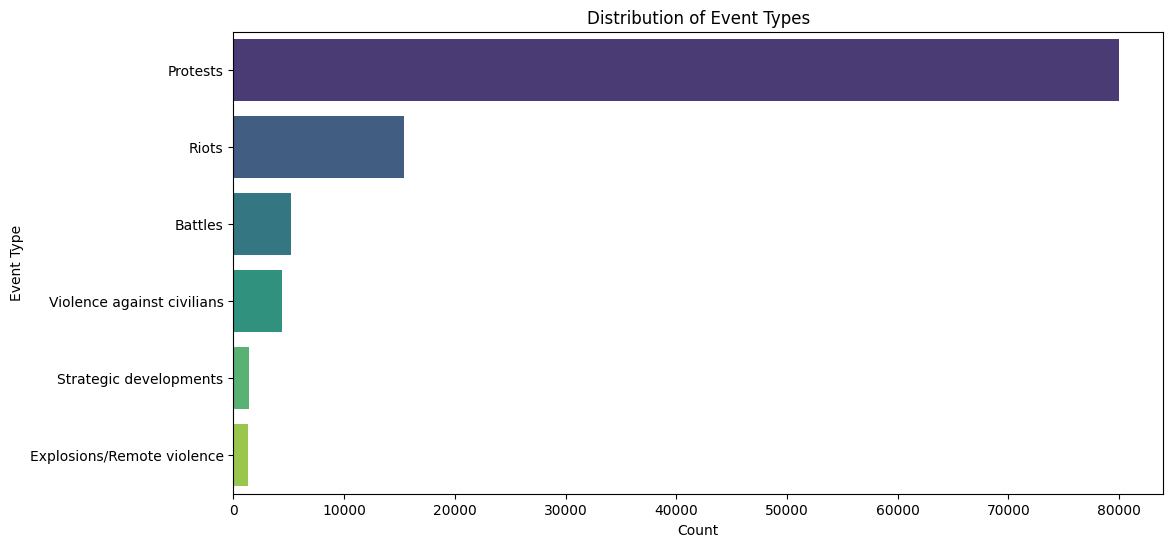

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='event_type', order=event_type_counts.index, palette='viridis')
plt.title('Distribution of Event Types')
plt.xlabel('Count')
plt.ylabel('Event Type')
plt.show()


### **Correlation heatmap for numerical columns**

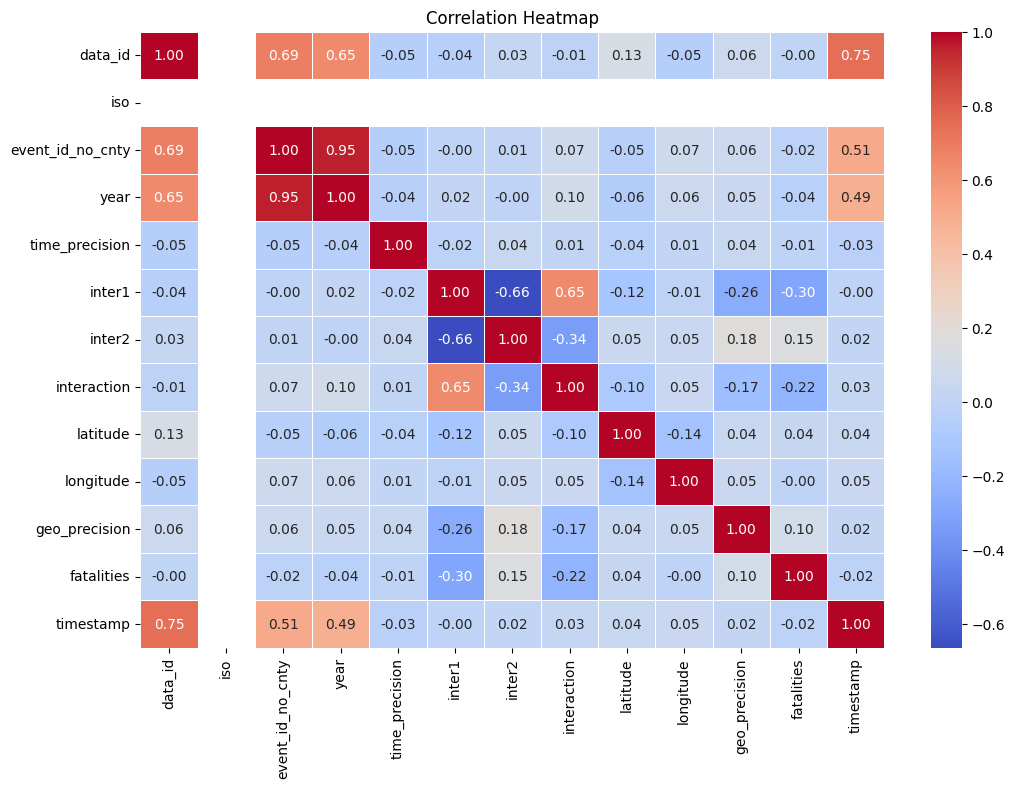

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
map_center = [data['latitude'].mean(), data['longitude'].mean()]
folium_map = folium.Map(location=map_center, zoom_start=5, tiles="CartoDB positron")

marker_cluster = MarkerCluster().add_to(folium_map)

for _, row in data.sample(500).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Event Type: {row['event_type']}<br>Location: {row['location']}<br>Fatalities: {row['fatalities']}",
        icon=folium.Icon(color='red' if row['fatalities'] > 0 else 'blue', icon='info-sign')
    ).add_to(marker_cluster)

# Save the map to an HTML file
folium_map.save("event_map.html")

print("Map created successfully! Open 'event_map.html' to view it.")


Map created successfully! Open 'event_map.html' to view it.


#### ** Group by year and event type to count events per year**

<Figure size 1400x700 with 0 Axes>

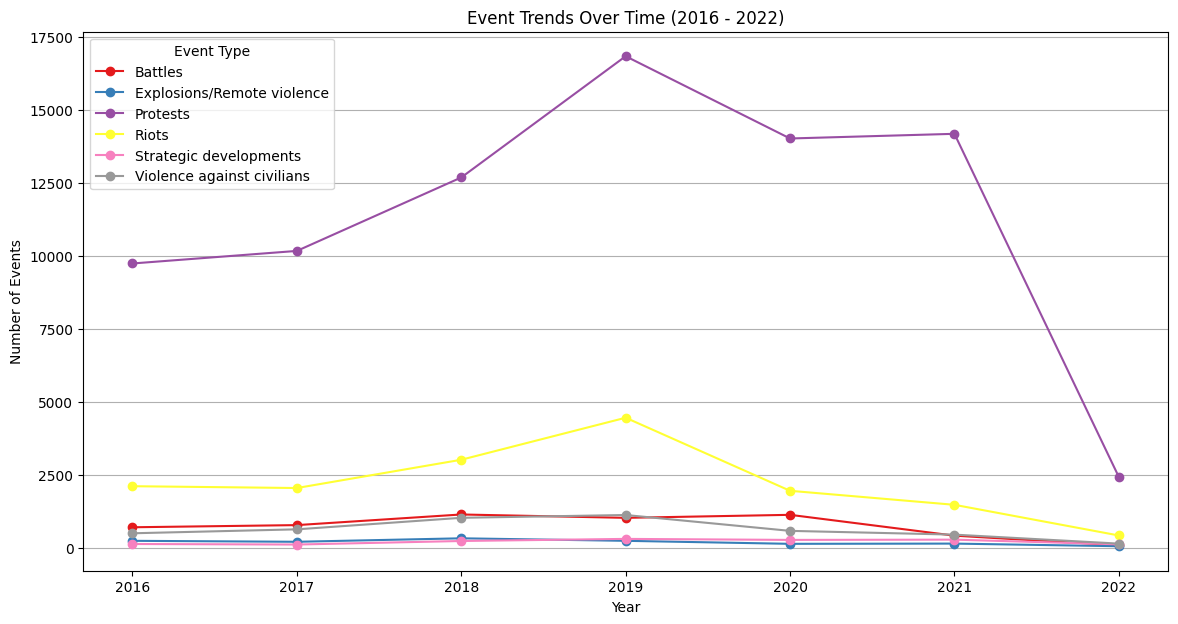

In [ ]:

data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')

event_trend = data.groupby(['year', 'event_type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 7))
event_trend.plot(kind='line', marker='o', figsize=(14, 7), colormap='Set1')
plt.title('Event Trends Over Time (2016 - 2022)')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(axis='y')
plt.legend(title='Event Type')
plt.show()


### ** Fatalities trend over time**

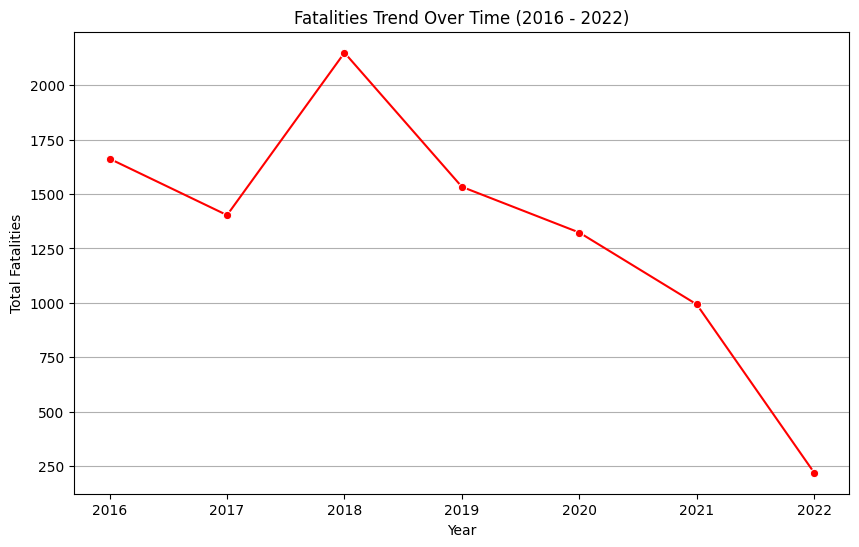

In [ ]:
fatalities_trend = data.groupby('year')['fatalities'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=fatalities_trend.index, y=fatalities_trend.values, marker='o', color='red')
plt.title('Fatalities Trend Over Time (2016 - 2022)')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(axis='y')
plt.show()


### ** Distribution of events by region

C:\Users\sharm\AppData\Local\Temp\ipykernel_17524\3568931616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_counts.index, x=region_counts.values, palette='coolwarm')


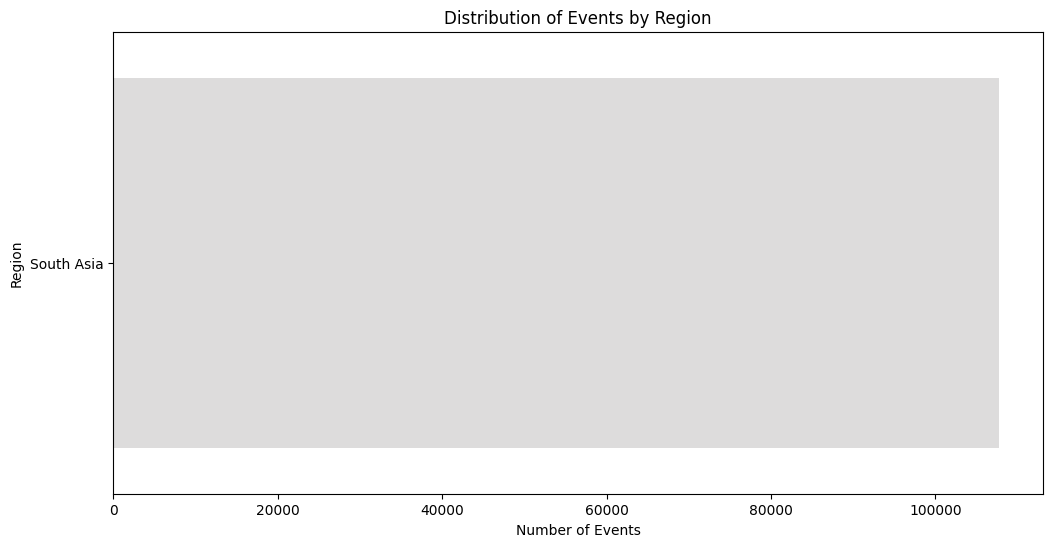

In [ ]:
region_counts = data['region'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=region_counts.index, x=region_counts.values, palette='coolwarm')
plt.title('Distribution of Events by Region')
plt.xlabel('Number of Events')
plt.ylabel('Region')
plt.show()


### ***# Top actors involved in events**

C:\Users\sharm\AppData\Local\Temp\ipykernel_17524\4238947162.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_actors.index, x=top_actors.values, palette='mako')


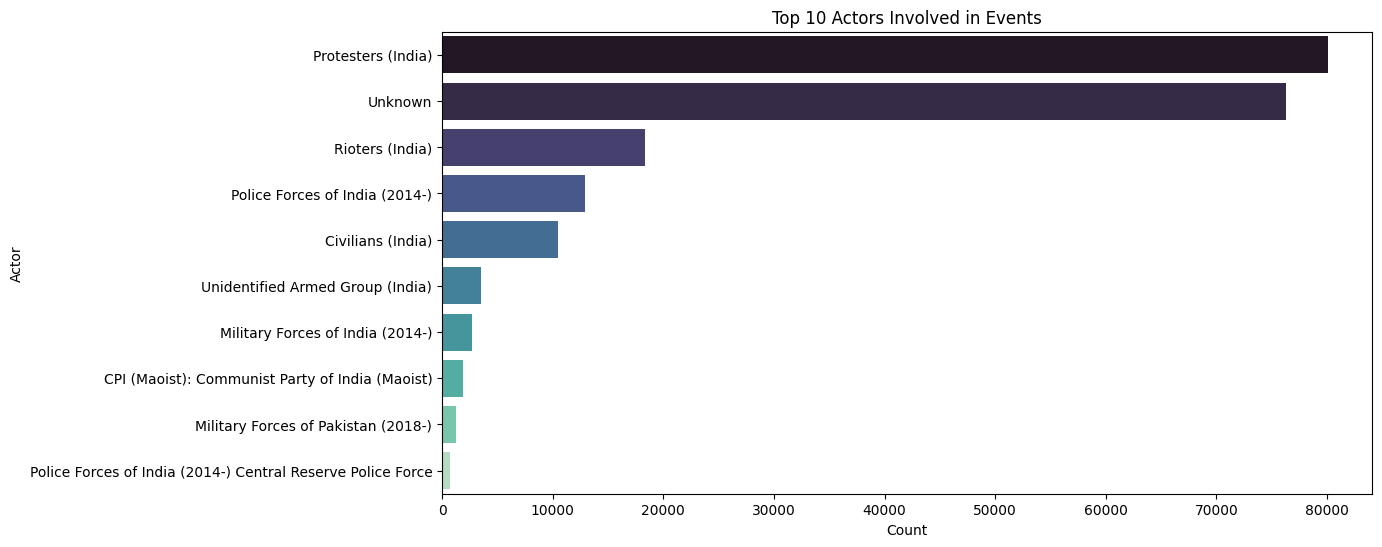

In [ ]:
top_actors = pd.concat([data['actor1'], data['actor2']]).value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_actors.index, x=top_actors.values, palette='mako')
plt.title('Top 10 Actors Involved in Events')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()


### ***# Create a GeoDataFrame for mapping fatalities as a heatmap**

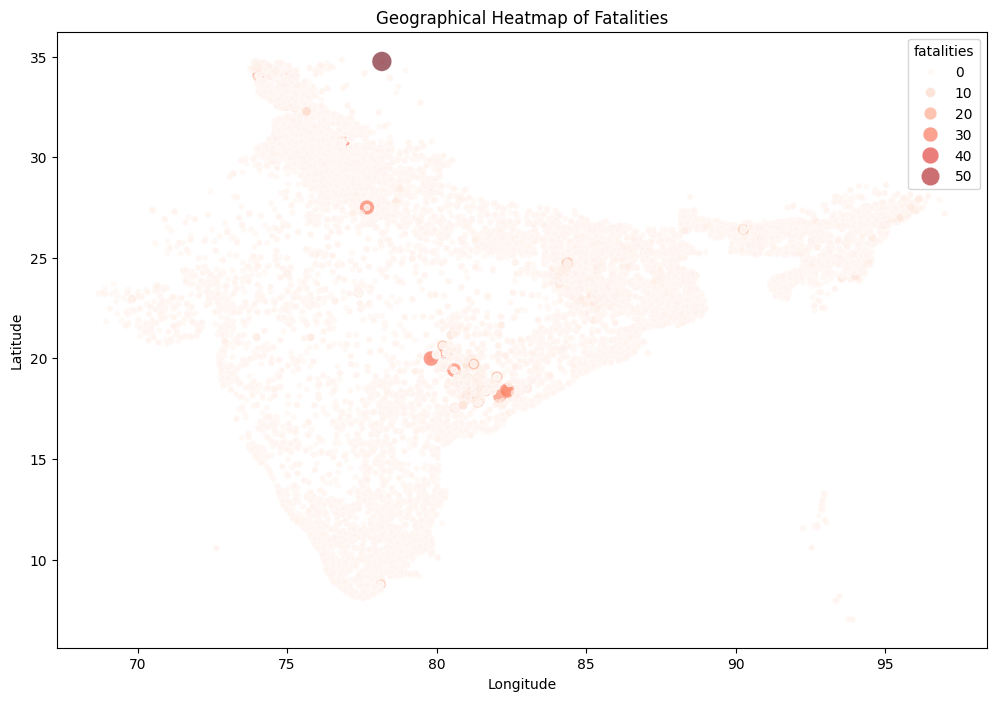

In [55]:
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='fatalities', size='fatalities',
                data=data, palette='Reds', sizes=(20, 200), alpha=0.6)
plt.title('Geographical Heatmap of Fatalities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\sharm\AppData\Local\Temp\ipykernel_17524\2892431014.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=violent_regions.index, x=violent_regions.values, palette='rocket')


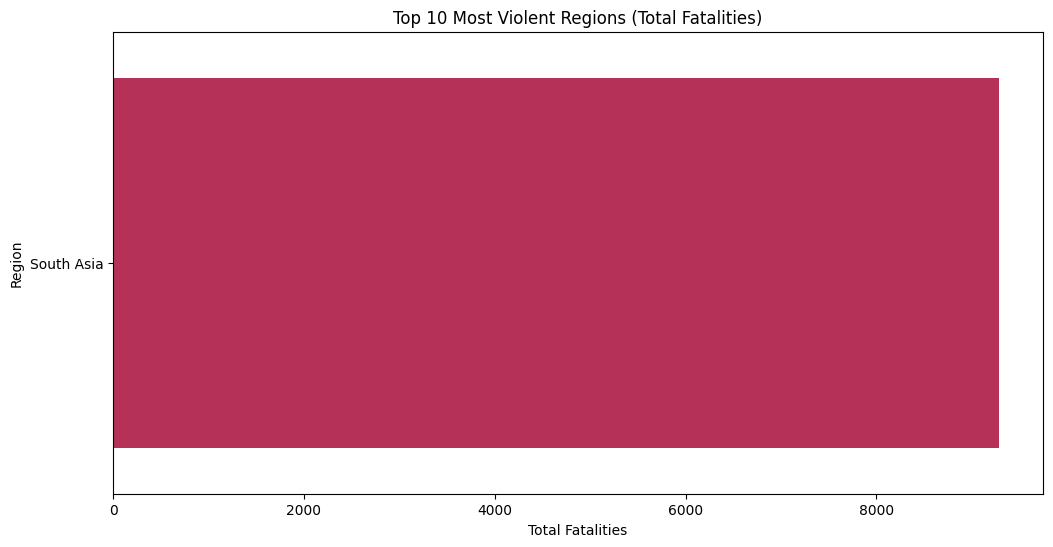

In [ ]:
violent_regions = data.groupby('region')['fatalities'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=violent_regions.index, x=violent_regions.values, palette='rocket')
plt.title('Top 10 Most Violent Regions (Total Fatalities)')
plt.xlabel('Total Fatalities')
plt.ylabel('Region')
plt.show()


C:\Users\sharm\AppData\Local\Temp\ipykernel_17524\1056862850.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sub_event_counts.index, x=sub_event_counts.values, palette='crest')


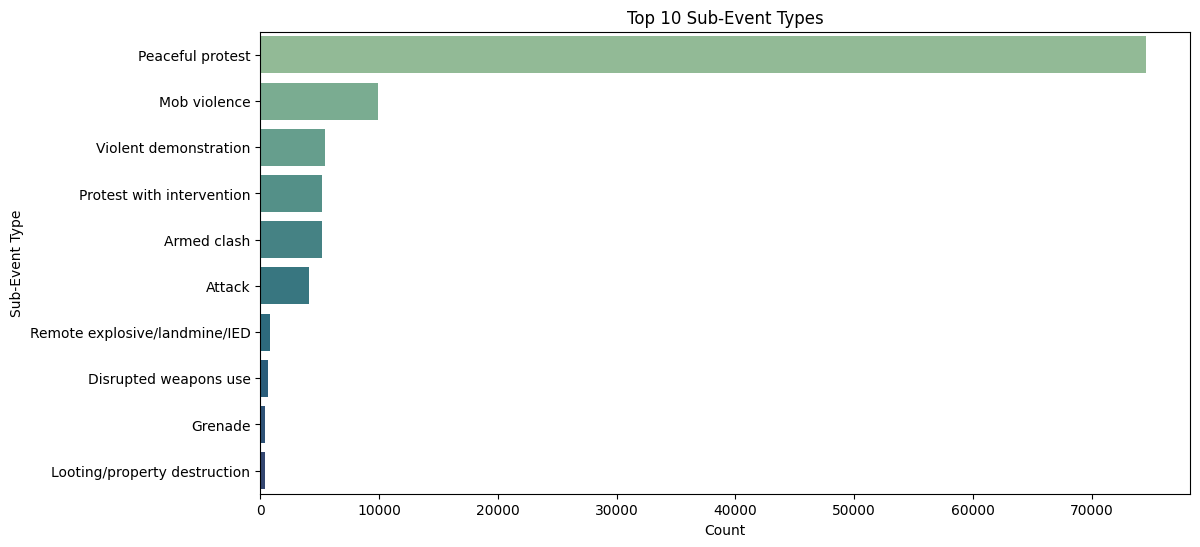

In [ ]:
sub_event_counts = data['sub_event_type'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=sub_event_counts.index, x=sub_event_counts.values, palette='crest')
plt.title('Top 10 Sub-Event Types')
plt.xlabel('Count')
plt.ylabel('Sub-Event Type')
plt.show()
